In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/나눔고딕.ttf').get_name() #한글이 꺠지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import train_test_split

import mglearn

## Decision Tree

- 설명하기 좋은 알고리즘
- 과적합 문제
- 전처리가 거의 필요없다.(표준화, scaling, 정규화)
- 균일도 측정방식
    - 엔트로피(혼잡도)를 이용한 Information Gain 지수(ID3 알고리즘)
    - 지니계수 : 0(평등;균일하지않음) --> 1(불평등;균일함)

#### 시각화 도구 설치

- http://www.graphviz.org
    + 프로그램 다운로드 후 설치(path 설정까지)
    
    
- pip install graphviz

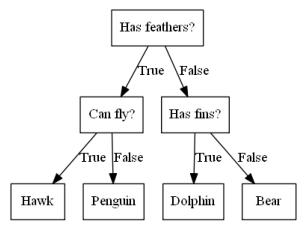

In [12]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
mglearn.plots.plot_animal_tree()

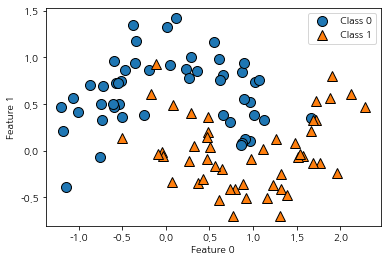

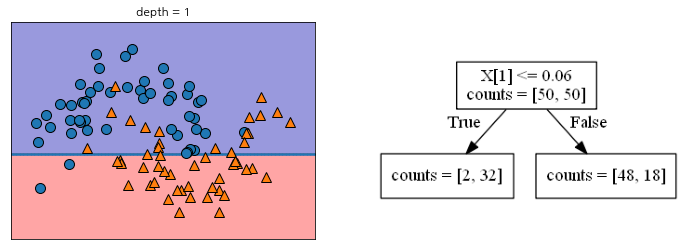

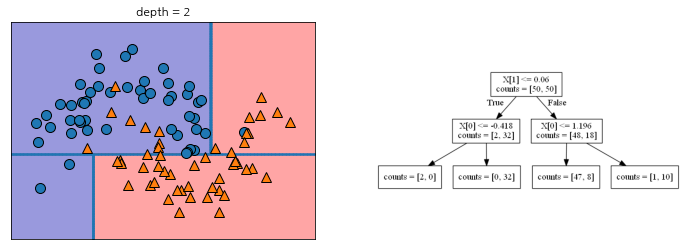

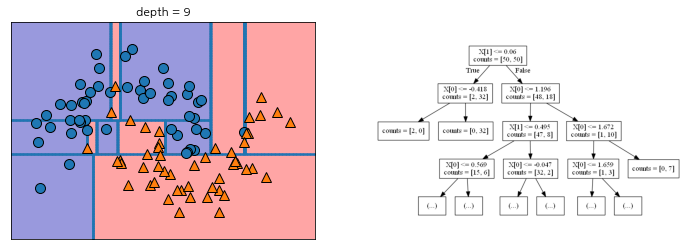

In [13]:
mglearn.plots.plot_tree_progressive()
# 선으로 구분하기 힘든 형태(로지스틱 등 적용 불가)

---
## 복잡도 제어 : Prunning(가지치기)

- 종류
    + 사전 가지치기
    + 사후 가지치기
    + sklearn에서는 사후 가지치기만 지원
    
- 파라미터
    + min_samples_split
    + min_samples_leaf
    + max_features
    + max_depth
    + max_leaf_nodes

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [18]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                   iris.target,
                                                   test_size = 0.2,
                                                   random_state=11)

In [20]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_train, y_train)

In [14]:
from sklearn.tree import export_graphviz

In [22]:
export_graphviz(dt_clf, out_file='data/tree.dot',
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True,
               filled=True)

In [23]:
import os
import graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

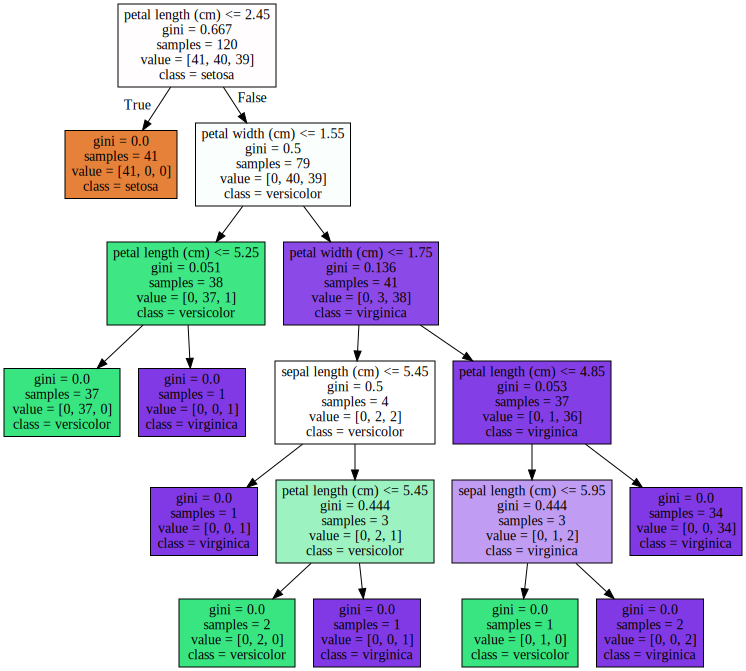

In [24]:
with open('data/tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

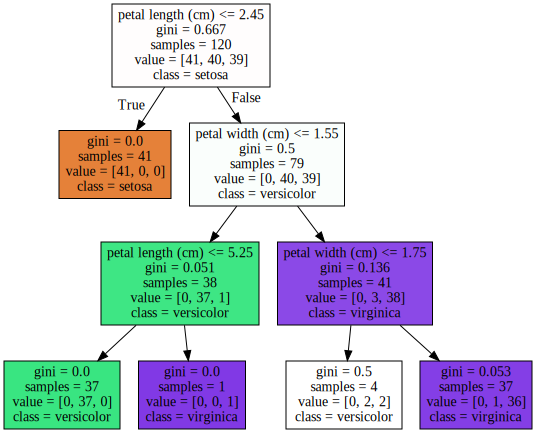

In [25]:
# max_depth
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='data/tree.dot',
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True,
               filled=True)

with open('data/tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

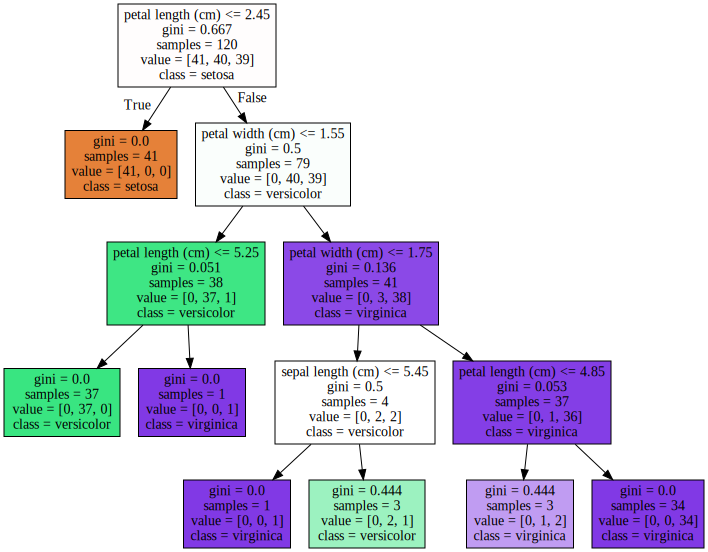

In [26]:
# min_samples_split : 분할하기위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='data/tree.dot',
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True,
               filled=True)

with open('data/tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

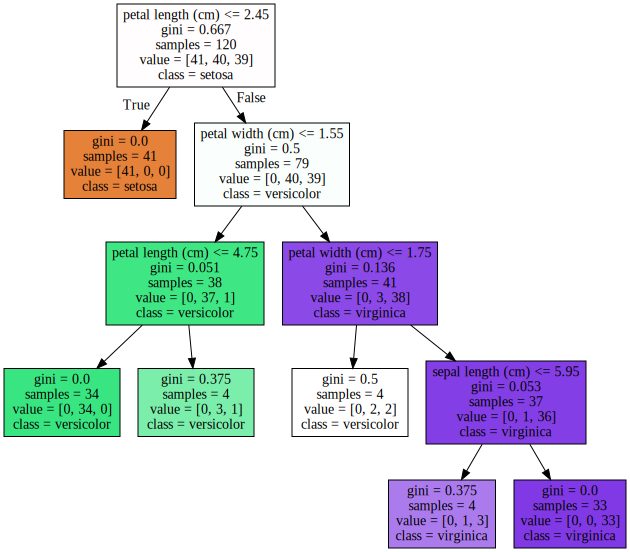

In [27]:
# min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='data/tree.dot',
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True,
               filled=True)

with open('data/tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

---
## 특성 중요도

In [29]:
print(dt_clf.feature_importances_)

[0.00594727 0.         0.5459484  0.44810433]


In [31]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.005947267560959518
sepal width (cm) 0.0
petal length (cm) 0.5459484001108248
petal width (cm) 0.44810433232821567


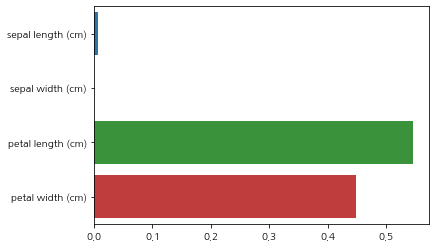

In [32]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

#### breast_cancer 데이터셋 활용

In [34]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   stratify = cancer.target, # 계층적으로 데이터를 추출
                                                   random_state = 42)

In [44]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [45]:
print('훈련 정확도 : ', tree.score(X_train, y_train))
print('테스트 정확도 : ', tree.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


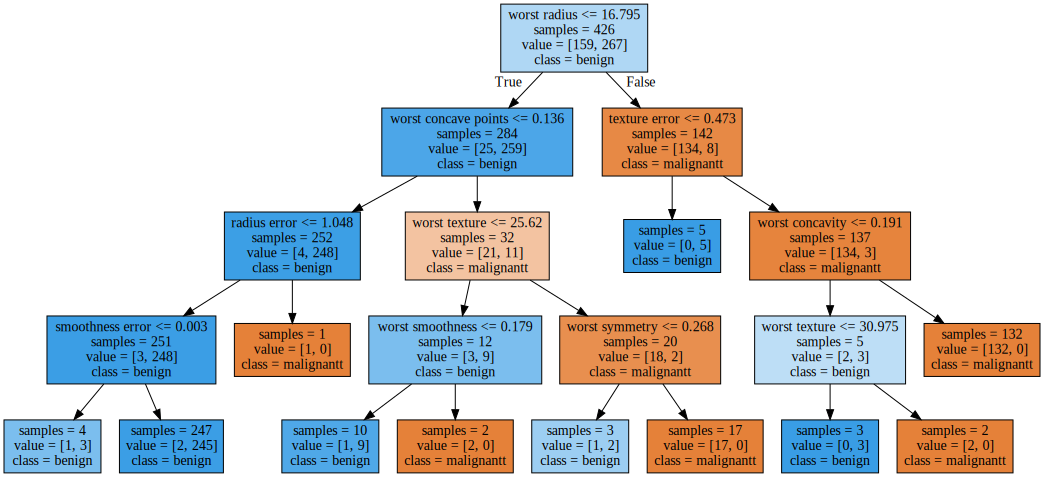

In [46]:
export_graphviz(tree, out_file='data/tree.dot',
               class_names=['malignantt','benign'],
               feature_names=cancer.feature_names,
               impurity=False,
               filled=True)

with open('data/tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [47]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


([<matplotlib.axis.YTick at 0x25241da6490>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

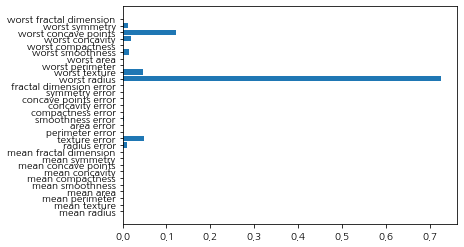

In [50]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)

### 사례1 : iris 데이터 활용

In [53]:
from sklearn import datasets

iris= datasets.load_iris()

In [56]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['result'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

x_train_std = sc.transform(X_train)
x_test_std = sc.transform(X_test)

array([[ 0.22512685,  0.35579762],
       [ 0.11355956, -0.02984109],
       [ 0.95031423,  1.12707506],
       [-1.39259884, -1.31530348],
       [ 0.72717965,  1.38416753],
       [-1.2252479 , -0.80111852],
       [-1.28103155, -1.31530348],
       [-0.16535866, -0.28693357],
       [ 0.95031423,  0.74143634],
       [ 1.06188152,  1.64126001],
       [ 0.671396  ,  0.35579762],
       [ 1.11766516,  0.74143634],
       [ 0.05777592, -0.15838733],
       [ 1.28501609,  1.38416753],
       [ 0.50404507,  0.48434386],
       [ 0.00199227, -0.15838733],
       [ 0.61561236,  0.74143634],
       [ 0.72717965,  0.35579762],
       [ 0.39247778,  0.6128901 ],
       [ 0.671396  ,  0.86998258],
       [ 0.50404507,  0.22725139],
       [ 0.78296329,  0.99852882],
       [ 0.39247778,  0.48434386],
       [-1.2252479 , -1.31530348],
       [ 0.72717965,  0.86998258],
       [ 0.22512685,  0.09870515],
       [-0.10957502,  0.09870515],
       [ 0.11355956,  0.09870515],
       [ 0.44826143,

In [61]:
model = DecisionTreeClassifier(random_state=0, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [62]:
print('훈련 정확도 : ', model.score(X_train,y_train))
print('테스트 정확도 : ', model.score(X_test,y_test))

훈련 정확도 :  0.9910714285714286
테스트 정확도 :  0.9473684210526315


### 사례2 : 서울 지역 동 보류

#### 서울 지역(구)의 경도와 위도를 사용해서 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [1]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [3]:
train_df=  pd.DataFrame(district_dict_list)
train_df = train_df[['district','longitude','latitude','label']]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [5]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [6]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong','longitude','latitude','label']]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [7]:
# 현재 가지고 있는 데이터에서 레이블 갯수 확인
print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangdong    5
Gangseo     5
Gangbuk     5
Gangnam     5
Name: label, dtype: int64
Gangdong    5
Gangseo     5
Gangbuk     5
Gangnam     5
Name: label, dtype: int64


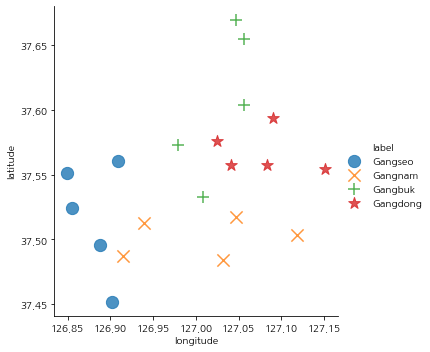

In [8]:
# 데이터 시각화

sns.lmplot('longitude','latitude',data=train_df, fit_reg=False,
          markers = ['o', 'x', '+', '*'], hue="label", scatter_kws={"s":150})

In [9]:
# 구 이름과 동 이름을 삭제
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

In [10]:
train_df
test_df

,longitude,latitude,label
0,126.854547,37.489853,Gangseo
1,126.859245,37.501394,Gangseo
2,126.847951,37.537759,Gangseo
3,126.815719,37.575817,Gangseo
4,126.891620,37.577039,Gangseo
5,127.030720,37.508838,Gangnam
6,127.057193,37.501163,Gangnam
7,127.018281,37.486401,Gangnam
8,126.988194,37.483279,Gangnam
9,127.043159,37.492896,Gangnam


In [11]:
X_train = train_df[['longitude','latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude','latitude']]
y_test = test_df[['label']]

In [12]:
# Label값을 숫자로 변환
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

C:\Users\User_\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [16]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

In [17]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

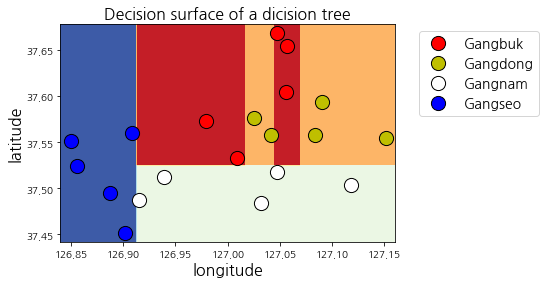

In [18]:
display_decision_surface(clf, X_train, y_encode)

In [19]:
clf = DecisionTreeClassifier(random_state=35, max_depth=4,
                            min_samples_leaf=2,
                            min_samples_split=2).fit(X_train, y_encode)

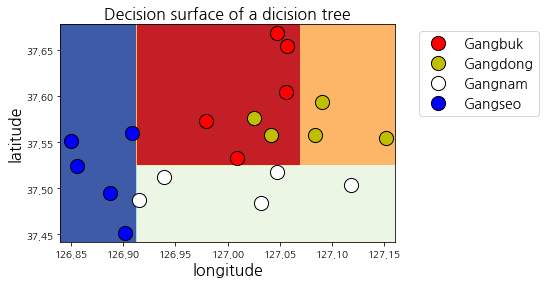

In [20]:
display_decision_surface(clf, X_train, y_encode)

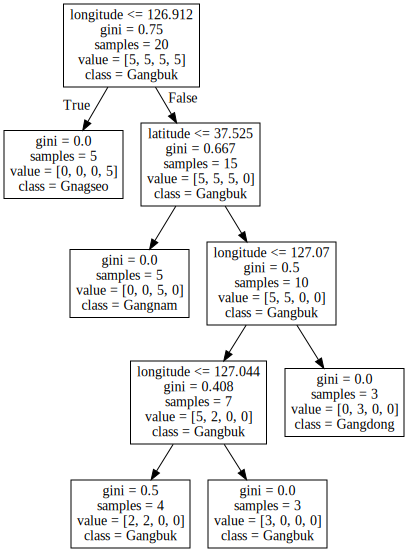

In [101]:
import os
import graphviz
from sklearn.tree import export_graphviz

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

graph = export_graphviz(clf, out_file=None,
               class_names=['Gangbuk', 'Gangdong', 'Gangnam','Gnagseo'],
               feature_names=['longitude','latitude'])
                            
g = graphviz.Source(graph)
g.render('seoul')
g

In [104]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print('정확도 : ', accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


---
## RandomForest

+ 앙상블(Ensemble)
    - vote 방식
        - 소프트 보팅
        - 하트 보팅
        
        
    - 종류
        - Voting
            - 여러 개의 분류기가 투푤르 통해 최종 예측 결과를 결정
            - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합
        
        - Bagging
            - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
            - Random Forest
            
        - Boosting
            - 여러 개의 분류기가 순차적으로 학습을 하되 앞에서 학습하 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting
            - Xboost, Light GBM, Stacking
            
+ 병렬 수행
    - n_jobs
    
    
+ 파라미터
    - n_estimeators
    - max_features
    - max_depth

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [109]:
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [110]:
forest = RandomForestClassifier(random_state=2, n_estimators = 5).fit(X_train, y_train)

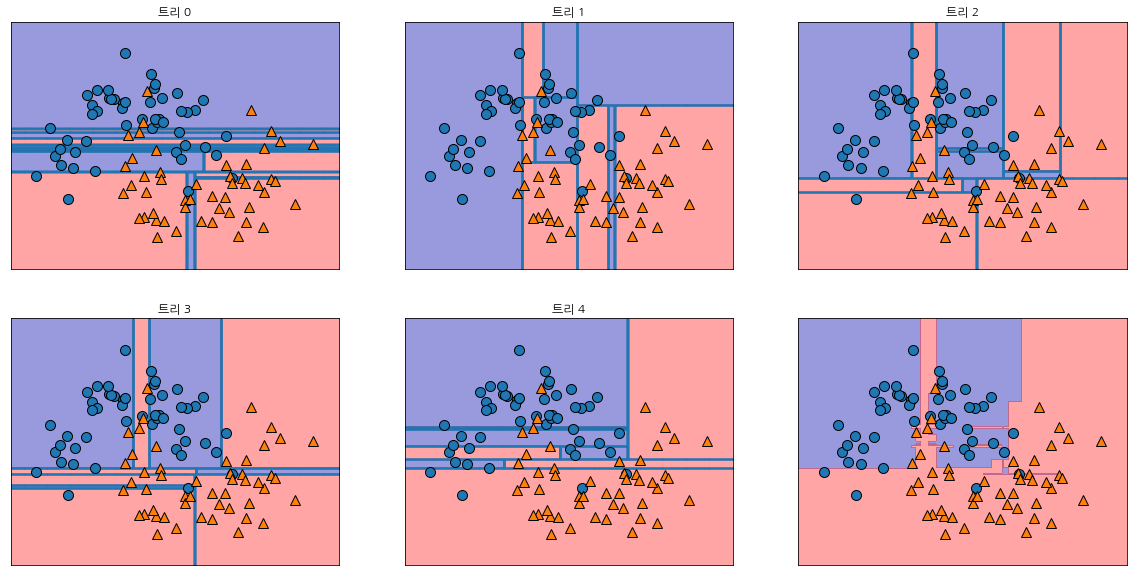

In [111]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## Decision Tree vs RandomForest

#### 1. cancer 데이터 활용

In [112]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [156]:
model1 = DecisionTreeClassifier(max_depth=4, random_state=0)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [157]:
print('훈련 정확도 : ', model1.score(X_train, y_train))
print('테스트 정확도 : ', model1.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.9020979020979021


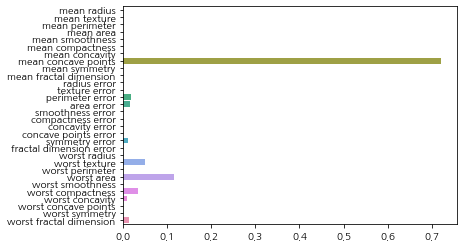

In [158]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

In [128]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [129]:
print('훈련 정확도 : ', model2.score(X_train, y_train))
print('테스트 정확도 : ', model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


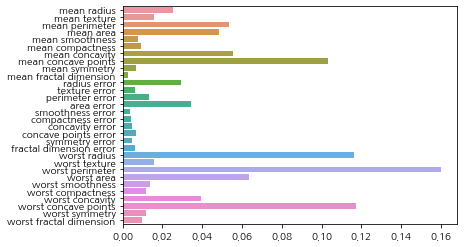

In [130]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

#### 2. 손글씨 이미지 데이터 활용

In [164]:
mnist = datasets.load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [165]:
X, y = mnist.data, mnist.target

In [166]:
# 교차검증을 위한 공용 함수
from sklearn.model_selection import cross_val_score

def cross_validation(clf, features, labels):
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
        
    return cv_scores

In [167]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

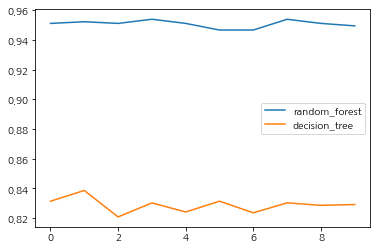

In [168]:
df = pd.DataFrame({'random_forest':rf_cv_scores, 'decision_tree':dt_cv_scores})
df.head()
df.plot()

In [169]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores)) # 랜덤포레스트가 더 우수

0.8288078833022967
0.9506322160148974


### 사례1 : 독버섯 데이터 활용

+ https://archive.ics.uci.edu/ml/index.php
+ https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
+ 파일명을 mushrooms.csv로 변경

In [173]:
import urllib.request as req

savedir = 'data/mushrooms.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
req.urlretrieve(url, savedir)
print('다운로드 완료')

다운로드 완료


In [231]:
mr = pd.read_csv('data/mushrooms.csv', header=None)
mr.shape
mr.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [232]:
# 결측치 확인
mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [233]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [234]:
# 데이터와 레이블 분리
X = mr.drop(0, axis=1)
y = mr[0]

In [235]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [236]:
# 데이터를 숫자화
from sklearn.preprocessing import LabelEncoder

encoder_X = LabelEncoder()

for col in X.columns:
    X[col] = encoder_X.fit_transform(X[col])
    
encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)

In [237]:
X.head()
y

array([1, 0, 0, ..., 0, 1, 0])

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [240]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [241]:
pred = clf.predict(X_test)

In [242]:
from sklearn.metrics import accuracy_score, classification_report

print('정답률 : ', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00       972

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [243]:
# decision tree

clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print('정답률 : ', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00       972

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [244]:
# KNN

clf = KNeighborsClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print('정답률 : ', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  0.999015263417036
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00       972

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [245]:
# Logistic Regression

clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred = clf.predict(X_test)

print('정답률 : ', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 :  0.9512555391432792
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1059
           1       0.95      0.95      0.95       972

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



---
## Gradient Boosting Regression Tree

+ 분류와 회귀에서 모두 사용 가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사하강법(Gradient Descent))
+ 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공
+ learning_rate를 사용하여 오차 보정

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [22]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=42)

In [23]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [24]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [25]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


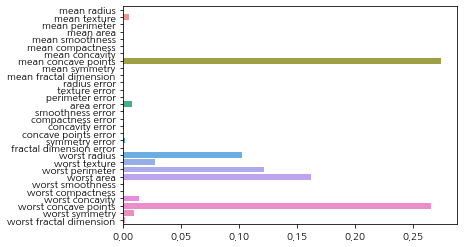

In [26]:
# 특성 중요도

tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

---
## Voting Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [29]:
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=156,
                                                   test_size=0.2)

In [30]:
lr_clf = LogisticRegression(max_iter= 10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [31]:
vo_clf = VotingClassifier(estimators = [("LR", lr_clf), ("KNN", knn_clf)],
                         voting='soft')

In [32]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [33]:
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : ', accuracy_score(y_test, pred))

Voting 분류기 정확도 :  0.956140350877193


In [36]:
classifiers = [lr_clf, knn_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    print("{0}정확도 : {1:4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression정확도 : 0.947368
KNeighborsClassifier정확도 : 0.938596


---
## Grid Search

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons

In [54]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                                   stratify=y)

In [55]:
# 기본값으로 확인
clf = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
clf.predict(X_train)

print('훈련 정확도 : ', clf.score(X_train, y_train))
print('테스트 정확도 : ', clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.94


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = {
    'n_estimators':[100, 200, 300],
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf':[1, 2, 3, 4, 5],
    'min_samples_split':[4, 8, 10, 11, 12, 13, 14]
}

clf2 = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(clf2, param_grid=params, cv=2, n_jobs = -1)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [58]:
print('최적의 하이퍼 파라미터\n', grid_cv.best_params_)
print('최고 예측 정확도 : ', grid_cv.best_score_)

최적의 하이퍼 파라미터
 {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도 :  0.9453333333333334


In [59]:
pred = grid_cv.best_estimator_.predict(X_test)
print('정확도 : ', accuracy_score(y_test, pred))

정확도 :  0.936


In [47]:
# Grident Boosting

clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf3.predict(X_test)

print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 : ", clf3.score(X_test, y_test))

훈련 정확도 :  0.988
테스트 정확도 :  0.932


In [48]:
params = {
    'n_estimators':[100, 200],
    'learning_rate':[0.1, 0.01, 0.001, 1],
    'max_depth':[3, 4, 5, 6, 7]
}

clf4 = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(clf4, param_grid=params, cv=2, verbose=1)

grid_cv.fit(X_train, y_train)

print("최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print("최고 예측 정확도 : ", grid_cv.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적의 하이퍼 파라미터
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
최고 예측 정확도 :  0.9373333333333334


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   24.5s finished


In [ ]:
pred = grid_cv.best_estimator_.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))